## [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/)
## Cod. 202321287
# Taller 3

# Librerías

In [1]:
from sympy import symbols, Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, pprint, init_printing, Derivative, sqrt, diff, Eq, tan
from sympy.physics.vector import dynamicsymbols, init_vprinting, ReferenceFrame
from numpy import deg2rad, linspace
import matplotlib.pyplot as plt
init_vprinting(use_latex='mathjax')

# Sobre diagramas y procesos
Para todos los puntos de asjunta un archivo .pdf con diagramas y procesos a fines, para mayor claridad del proceso que se llevo acabo en cada ejercicio.

# Ejercicio 1 Sistema Manivela-rodillo-punzonador
Se tiene que la manivela OA gira con theta = 60deg
se tiene theta_dot = 4 rad/s
se tiene theta_dot_dot = 8 rad/s^2

y necesitamos encontrar la aceleración en el eje vertical de B

In [2]:
# variables
t = symbols("t")
theta = dynamicsymbols("theta")

# Parámetros
OA = 0.08 # m, tamaño eslabon OA
r = 0.02 # m, esta es el radio del rodillo

# Posición de A
x_A= OA*cos(theta)
y_A= OA*sin(theta)

# Posición de B
y_B = y_A + r

# Derivadas respecto al tiempo
y_B_dot = diff(y_B, t)
y_B_ddot = diff(y_B_dot, t)

# Sustituir condiciones del problema
# theta = 60° en radianes
theta_val = deg2rad(120)
theta_dot_val = -4.0
theta_ddot_val = -8.0

# Usamos sympy para sustituir
subs_dict = {
    theta: theta_val,
    diff(theta, t): theta_dot_val,
    diff(theta, t, 2): theta_ddot_val
}

vB = float(y_B_dot.subs(subs_dict))
aB = float(y_B_ddot.subs(subs_dict))
print("Velocidad del eje B =", vB, "m/s")
print("Aceleración del eje B =", aB, "m/s^2")

Velocidad del eje B = 0.15999999999999992 m/s
Aceleración del eje B = -0.7885125168440819 m/s^2


## Verificación con otros valores comparando a resultado en internet [Ejercicio en chegg](https://www.chegg.com/homework-help/questions-and-answers/determine-acceleration-ab-positive-negative-shaft-b-52-crank-oa-angular-acceleration-81-ra-q8564181)

In [3]:
# variables
t = symbols("t")
theta = dynamicsymbols("theta")

# Parámetros
OA = 0.079 # m, tamaño eslabon OA
r = 0.022 # m, esta es el radio del rodillo

# Posición de A
x_A= OA*cos(theta)
y_A= OA*sin(theta)

# Posición de B
y_B = y_A + r

# Derivadas respecto al tiempo
y_B_dot = diff(y_B, t)
y_B_ddot = diff(y_B_dot, t)

# Sustituir condiciones del problema
# theta = 60° en radianes
theta_val = deg2rad(-52+180)
theta_dot_val = -3.9
theta_ddot_val = -8.1

# Usamos sympy para sustituir
subs_dict = {
    theta: theta_val,
    diff(theta, t): theta_dot_val,
    diff(theta, t, 2): theta_ddot_val
}

vB = float(y_B_dot.subs(subs_dict))
aB = float(y_B_ddot.subs(subs_dict))
print("Velocidad del eje B =", vB, "m/s")
print("Aceleración del eje B =", aB, "m/s^2")

Velocidad del eje B = 0.1896853005478353 m/s
Aceleración del eje B = -0.5529040633654123 m/s^2


## Análisis
Las magnitudes obtenidas tienen sentido, pues por lógica vemos que el mecanismo va a empezar a bajar de nuevo cuando el rodillo llegue a su máxima altura, y por esot la aceleración tiene que ir disminuyendo, sin embargo vemos que la velocidad en el eje B es positiva, pues esta yendo en dirección positiva arriba.
## Plot extra
Dejo un plot extra que hice con [ChatGPT5](https://chatgpt.com) para ilustrar el movimiento del mecanismo

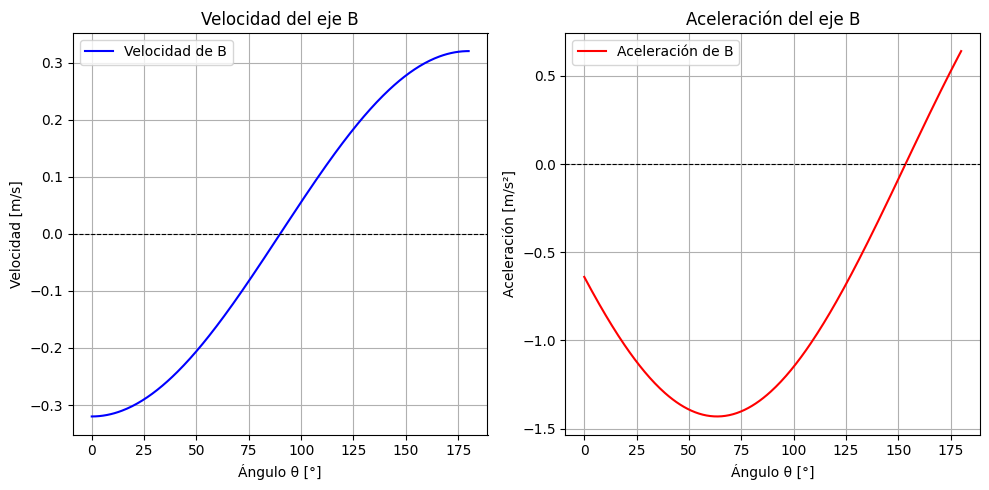

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin, pi, diff, lambdify
from sympy.physics.mechanics import dynamicsymbols

# Variables simbólicas
t = symbols("t")
theta = dynamicsymbols("theta")

# Parámetros del mecanismo
OA = 0.08  # m
r = 0.02   # m

# Posición de A
x_A = OA*cos(theta)
y_A = OA*sin(theta)

# Posición de B
y_B = y_A + r

# Derivadas simbólicas
y_B_dot = diff(y_B, t)       # velocidad
y_B_ddot = diff(y_B_dot, t)  # aceleración

# Expresiones lambdify (parametrizamos por theta, theta_dot y theta_ddot)
vB_fun = lambdify([theta, diff(theta,t)], y_B_dot, "numpy")
aB_fun = lambdify([theta, diff(theta,t), diff(theta,t,2)], y_B_ddot, "numpy")

# Valores de velocidad angular y aceleración angular constantes
theta_dot_val = -4.0   # rad/s
theta_ddot_val = -8.0  # rad/s^2

# Rango de ángulos (0 a 180° en radianes)
theta_vals = np.linspace(0, np.pi, 300)

# Evaluamos velocidad y aceleración en ese rango
v_vals = vB_fun(theta_vals, theta_dot_val)
a_vals = aB_fun(theta_vals, theta_dot_val, theta_ddot_val)

# Gráficas
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(np.degrees(theta_vals), v_vals, label="Velocidad de B", color="blue")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xlabel("Ángulo θ [°]")
plt.ylabel("Velocidad [m/s]")
plt.title("Velocidad del eje B")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.degrees(theta_vals), a_vals, label="Aceleración de B", color="red")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xlabel("Ángulo θ [°]")
plt.ylabel("Aceleración [m/s²]")
plt.title("Aceleración del eje B")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Ejercicio 2 Slider
Este es un ejercicio típico, y se puede derivar de hecho una relación geométrica simple para relacionar el movimiento en eje x con el ángulo theta, sin embargo la derivación de la misma es algo compleja (Esto lo vimos en la clase complementaría).

Por esto mismo en cambio vamos a encontrar un camino de vectores que sumen 0, y a partir de aquí con una restricción podemos despejar el vector OC que es el que buscamos.

In [5]:
t = dynamicsymbols._t # tiempo canónico de SymPy mechanics, no se porque no quería funcionar hasta que no agregara esto
b = symbols('b', real=True)
theta,x = dynamicsymbols('theta x')

N = ReferenceFrame('N')                     
i, j = N.x, N.y

# (a) POSICIÓN MEDIANTE VECTORES

r_OB = b*cos(theta)*i + b*sin(theta)*j

# Deslizador C
r_OC = x*i

# Barra 2: BC
r_BC = r_OC - r_OB

# Restricción: |BC| = b, es decir que este tiene que tener longitud b
constraint_eq = (r_BC.dot(r_BC) - b**2).simplify()
# Nota. Cuando hacemos producto punto con si mismo sacamos |BC|**2, por eso le restamos b para que la condición quede igual a 0
print("CConstraints:")
display(constraint_eq)
# Resolviendo para x
sols_x = solve(constraint_eq, x)
x_expr = sols_x[-1]   
# Vectores explícitos
    
r_OC_explicit = x_expr*i
r_BC_explicit = r_OC_explicit - r_OB

print("\n (a) POSICIÓN")
print("\n Vector OB")

display(r_OB)
print("\n Vector BC")
display(r_BC_explicit.simplify())

print("\n Vector OC")
display(r_OC_explicit)

print("\n Posición slider")
display(x_expr)           

# (b) VELOCIDAD DEL DESLIZADOR C

# Derivar 
xdot = diff(x_expr, t).simplify()
display(xdot)

print("\n (b) VELOCIDAD")
display(xdot)      # Velocidad en x

# (c) ACELERACIÓN DEL DESLIZADOR C

# Derivar nuevamente para obtener la aceleración
xddot = diff(xdot, t).simplify()

print("\n (c) ACELERACIÓN")
display(xddot)      # Aceleración escalar

CConstraints:


(-2⋅b⋅cos(θ) + x)⋅x


 (a) POSICIÓN

 Vector OB


b⋅cos(θ) n_x + b⋅sin(θ) n_y


 Vector BC


b⋅cos(θ) n_x + -b⋅sin(θ) n_y


 Vector OC


2⋅b⋅cos(θ) n_x


 Posición slider


2⋅b⋅cos(θ)

-2⋅b⋅sin(θ)⋅θ̇


 (b) VELOCIDAD


-2⋅b⋅sin(θ)⋅θ̇


 (c) ACELERACIÓN


     ⎛                   2⎞
-2⋅b⋅⎝sin(θ)⋅θ̈ + cos(θ)⋅θ̇ ⎠

## Análisis
El resultado tiene sentido si consideramos las magnitudes y signos de la velocidad, pues estos son negativos cuando el ángulo es positivo (Note que si el ángulo crece nos movemos de hecho para la izquierda)
## Plot extra
Dejo un plot extra que hice con [ChatGPT5](https://chatgpt.com) para ilustrar el movimiento del mecanismo

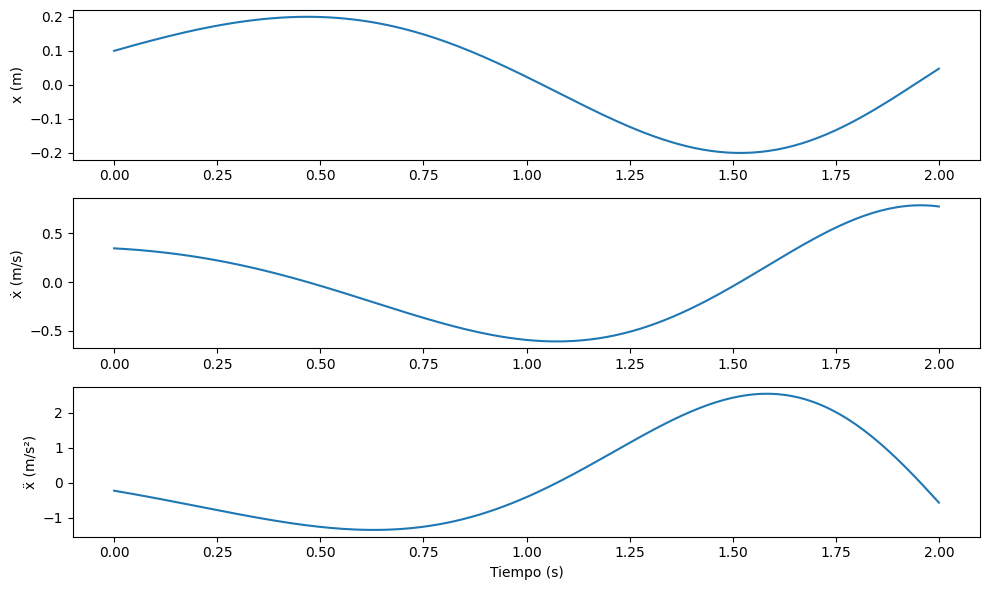

In [6]:
# Ejemplo numérico

# Parámetros
b_val = 0.1   # longitud en m
theta0 = pi/3 # rad (60°)
omega = -2.0  # rad/s
alpha = -1.0  # rad/s²

# Definimos la trayectoria de theta(t)
def theta_t(tt): return float(theta0 + omega*tt + 0.5*alpha*tt**2)
def theta_dot_t(tt): return float(omega + alpha*tt)
def theta_ddot_t(tt): return float(alpha)

# Rango de tiempo
tt_vals = linspace(0, 2, 200)

# Cálculos
x_vals = [2*b_val*cos(theta_t(tt)) for tt in tt_vals]
x_dot_vals = [-2*b_val*sin(theta_t(tt))*theta_dot_t(tt) for tt in tt_vals]
x_ddot_vals = [-2*b_val*cos(theta_t(tt))*theta_dot_t(tt)**2 - 2*b_val*sin(theta_t(tt))*theta_ddot_t(tt) for tt in tt_vals]

# Graficamos
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(tt_vals, x_vals)
plt.ylabel("x (m)")

plt.subplot(3,1,2)
plt.plot(tt_vals, x_dot_vals)
plt.ylabel("ẋ (m/s)")

plt.subplot(3,1,3)
plt.plot(tt_vals, x_ddot_vals)
plt.ylabel("ẍ (m/s²)")
plt.xlabel("Tiempo (s)")

plt.tight_layout()
plt.show()

# Ejercicio 3 Para el sistema en el que pin ancla al collar deslizante A con la barra OB, dar expresiones que describan las variables 𝑦̈ del collar A en términos de 𝜃 (𝑦 𝑠𝑢𝑠 𝑑𝑒𝑟𝑖𝑣𝑎𝑑𝑎𝑠 𝜃̇ 𝑦 𝜃̈ ).

In [7]:
theta = dynamicsymbols('theta')
R = symbols('R')
b = symbols('b')


A_y = b*tan(theta)
print("Expresion para la posicisión en terminos de A_y")
display(A_y)
print("\nA_y en términos de R y theta:")

A_y_R = A_y.subs(b, R*cos(theta)).simplify()

display(A_y_R)


# luego las derivadas son

A_y_dot = diff(A_y, t).simplify()
A_y_ddot = diff(A_y_dot, t).simplify()
A_y_dot_R = diff(A_y_R, t).simplify()
A_y_ddot_R = diff(A_y_dot_R, t).simplify()


# Mostrar resultados
print("Velocidad de y en A")
display(A_y_dot)

print("\n Aceleración de y en A:")
display(A_y_ddot)

# Sustituyendo en términos de R y θ para velocidad
print("\nVelocidad de y en A (con R y θ):")
display(A_y_dot_R)

# Sustituyendo en términos de R y θ para aceleración
print("\nAceleración de y en A (con R y θ):")
display(A_y_ddot_R)



Expresion para la posicisión en terminos de A_y


b⋅tan(θ)


A_y en términos de R y theta:


R⋅sin(θ)

Velocidad de y en A


  b⋅θ̇  
───────
   2   
cos (θ)


 Aceleración de y en A:


  ⎛          2           ⎞
b⋅⎝2⋅sin(θ)⋅θ̇  + cos(θ)⋅θ̈⎠
──────────────────────────
            3             
         cos (θ)          


Velocidad de y en A (con R y θ):


R⋅cos(θ)⋅θ̇


Aceleración de y en A (con R y θ):


  ⎛          2           ⎞
R⋅⎝- sin(θ)⋅θ̇  + cos(θ)⋅θ̈⎠

## Análisis
El ejercicio aunque tiene varias juntas es fácil de simplificar si uno aprovecha la geometría del ejercicio. Personalmente para mi tiene más sentido encontrar las variables en terminos de b, pero [vi en internet](https://www.chegg.com/homework-help/questions-and-answers/pin-attached-sliding-collar-engages-slot-bar-ob--determine-speed-y-terms-theta-theta-b-acc-q194549937) que varios resultados los dejan en termino de R, por lo que ofrezco ambas formas, que son equivalentes.

# Ejercicio 4
# Problema Robocol, charla de Juan Pablo Santa
## Introducción
* Boya sonográfica
* Debe cambiar su densidad y estar varios días en el mar
* Puede sumergirse casi 1k bajo elmar
* Mide salinidad y otras cosas
* Compoetencia de submarino
* Esta boya es uno de los requisitos que deben cumplit.
### Profiling Float
Esta solo debe cambiar su densidad, bajar x cantidad de metros, tomar datos y subir.
## Requerimientos 
* Debe tener un desenso de 2.5 metros
* Estar 2.5m bajo el agua por 45s
* Regresar a la superficie
* Trasmitir datos
* Repetir al menos dos veces
* \rho = masa/volumen
* La estrategia es cambiar la masa, pero Juan cambia el volumen
* Elastomero que debe ser capaz de resistir la salinidad y el volumen
## Tarea
* Debemos caracterizar cuantas vueltas debe dar la varilla para saber cuanto volumen vamos a generar, la idea es obtener una gráfica con el número de vueltas y el volumen obtenido.

## Aproach inicial
Inicialmente se modela de forma básica el movimiento mediante la relación trigonométrica que hay entre los brazos y el rádio, que resulta se puede modelar por medio de pytagoras, relaciones trigonometricas o un ciclo de vectores con suma 0. Inicialmente intente hacerlo de manera geométrica pero teniendo en cuenta únicamente el crecimiento del rádio y simplificando el problema de tal forma que no se tuviera en cuenta la geometría del flotador

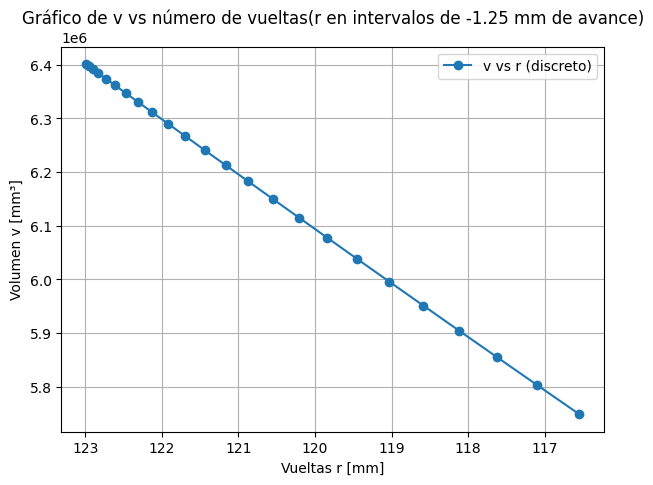

In [8]:
# Parámetros simbólicos
l, h_c = symbols('l h_c') 
# Donde l es la longitud de los eslabones 
# h_c es la altura de la pieza, específicamente la altura de nuestro cilindro

# Definimos parámetros fijos de ejemplo
l_val = 73   # mm
h_c_val = 134.7  # mm

# Definimos función de r(t) y v(r)
def r_t(t, l_val):
    return (((l_val)**2 - (t)**2)**0.5) + 50

def v_r(r, h_c_val):
    return pi*r**2*h_c_val

# Intervalos en pasos de 1.25 mm
t_values = np.arange(30, 0, -1.25)  # por ejemplo hasta 100 mm
r_values = r_t(t_values, l_val)
v_values = v_r(r_values, h_c_val)

# Graficar
plt.figure(figsize=(7,5))
plt.plot(r_values, v_values, marker='o', label="v vs r (discreto)")
plt.gca().invert_xaxis()
plt.xlabel("Vueltas r [mm]")
plt.ylabel("Volumen v [mm³]")
plt.title("Gráfico de v vs número de vueltas(r en intervalos de -1.25 mm de avance)")
plt.grid(True)
plt.legend()
plt.show()


## Código final con consideraciones de geometría
Una vez se tuvo un resultado sensible, con sentido (se sabía desde un inicio que la relación debía ser cuadrática, pues el volumen depende según el cuadrado del rádio), pero ahora tenemos que agregar más sentido geométrico con ayuda del CAD y las diferentes restrucciones físicas de obtenemos.

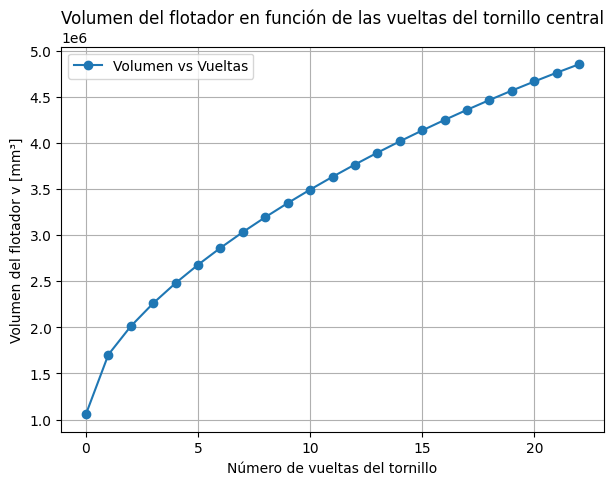

In [ ]:
# Parámetros simbólicos
l, h_c = symbols('l h_c')

# Parámetros geométricos y de ensamble
l_val = 73        # [mm] longitud del eslabón
h_c_val = 134.7   # [mm] altura del flotador cilíndrico

r_min = 50        # [mm] radio mínimo del flotador (posición cerrada)
avance_vuelta = 1.25  # [mm/vuelta] paso del tornillo
t_max = 27.0      # [mm] desplazamiento máximo del tornillo (posición abierta)
t_min = 0         # [mm] desplazamiento mínimo del tornillo (posición cerrada)

# Relación entre desplazamiento t y radio r
def r_t(t, l_val, r_min):
    return np.sqrt(2*l_val*t - t**2) + r_min

# Volumen del flotador (cilindro de radio r y altura h_c)
def v_r(r, h_c_val):
    return pi * r**2 * h_c_val

# Discretización del movimiento
t_values = np.arange(t_min, t_max + avance_vuelta, avance_vuelta)

# Número de vueltas correspondientes
vueltas = (t_values - t_min) / avance_vuelta

# Cálculo de radios y volúmenes
r_values = r_t(t_values, l_val, r_min)
v_values = v_r(r_values, h_c_val)

# Gráfica Volumen vs Vueltas
plt.figure(figsize=(7,5))
plt.plot(vueltas, v_values, marker='o', label="Volumen vs Vueltas")
plt.xlabel("Número de vueltas del tornillo")
plt.ylabel("Volumen del flotador v [mm³]")
plt.title("Volumen del flotador en función de las vueltas del tornillo central")
plt.grid(True)
plt.legend()
plt.show()

## Análisis
Podemos ver al final que a medida que aumentan el número de vueltas, es decir se reduce el tamaño del tornillo, va a ir aumentando el radio del mecanismo con forme con una relación cuadrática muy marcada, aquí podemos ver cual va a ser la diferencia de volumen obtenida, además que a medida que aumentamos las vueltas, este crece rápidamente y al final los incrementos empiezan a ser cada vez más pequeños, como es de esperar de una relación de este tipo
## Consideraciones para el diseño
Hay que evaluar si esta diferencia de volúmen si podra permitir al flotador desender la altura requerida por la competencia. Si esto resulta ser válido, considero que es un buen aproach pues este mecanismo parece ser robusto y probablemente pueda cumplir varios ciclos de funcionamiento (Muchos más que los dos requeridos por la competencia.)